1. Create a new workspace with name demo-endpoint
2. Upload the data set to workspace storage
3. Go to Notebooks section, create a new folder called Diabetes
4. In the folder, create a new notbook called Train-Model
5. Walk through creating the notebook
6. Run the training step-by-step
7. Review MLflow generated output
8. Within the job review page, manually Register the model as DiabetesTree
9. Go to Models page, click on model name
10. Click on Endpoints tab within Models page
11. From Deploy drop-down, select Real-time endpoint
12. Walk through deployment process
13. Wait for deployment to complete
14. When complete, use the test endpoint. Paste in data from original data source
      - Show that 1 and 0 results are being predicted as expected
15. Use CLI to get application key
16. Use RapidAPI to test the endpoint, showing that we can submit input and receive outputs that could be consumed by an application
17. Summary
      - Created an Azure ML workspace
      - Uploaded a data set & traine a model
      - Registered the validated model in the workspace
      - Deploye an enpoint external applications can use to generate inferences using the model
      


In [ ]:
# Check if mlflow is installed
%pip show mlflow

In [8]:
# Read data set from AzureML Workspace to dataframe
import pandas as pd

print("Reading data into dataframe...")
df = pd.read_csv(
    "",
    index_col = "PatientID"
)

# Take a peek at the data set 
print(df.shape)
df.head(3)


Reading data into dataframe...
(10000, 9)


,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
PatientID,,,,,,,,,
1354778,0,171,80,34,23,43.509726,1.213191,21,0
1147438,8,92,93,47,36,21.240576,0.158365,23,0
1640031,7,115,47,52,35,41.511523,0.079019,23,0


In [9]:
from sklearn.model_selection import train_test_split

# Split data into train/test dataframes
print("Splitting data...")

X, y = df[['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']].values, df['Diabetic'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Train/Test Data Shape:")
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

Splitting data...
Train/Test Data Shape:
(7000, 8) (7000,) (3000, 8) (3000,)


Begin training...


2023/10/22 20:56:52 WARNING mlflow.sklearn: Failed to log evaluation dataset information to MLflow Tracking. Reason: BAD_REQUEST: Response: {'Error': {'Code': 'UserError', 'Severity': None, 'Message': 'Cannot log the same dataset with different context', 'MessageFormat': None, 'MessageParameters': None, 'ReferenceCode': None, 'DetailsUri': None, 'Target': None, 'Details': [], 'InnerError': None, 'DebugInfo': None, 'AdditionalInfo': None}, 'Correlation': {'operation': '3625da882c6d9f3f14fa9732fc2e23aa', 'request': '05cdeef8149a34b6'}, 'Environment': 'eastus', 'Location': 'eastus', 'Time': '2023-10-22T20:56:52.7296143+00:00', 'ComponentName': 'mlflow', 'statusCode': 400, 'error_code': 'BAD_REQUEST'}
2023/10/22 20:56:52 WARNING mlflow.sklearn: Failed to log evaluation dataset information to MLflow Tracking. Reason: BAD_REQUEST: Response: {'Error': {'Code': 'UserError', 'Severity': None, 'Message': 'Cannot log the same dataset with different context', 'MessageFormat': None, 'MessageParamet

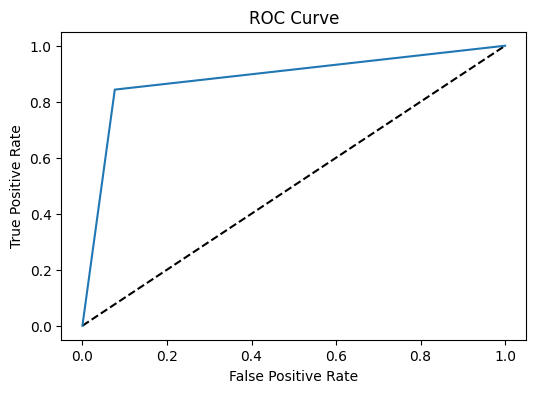

In [11]:
# Train a model 
import mlflow
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

with mlflow.start_run():
    mlflow.set_experiment("Demo-Publishe-Endpoint")
    mlflow.sklearn.autolog()

    print("Begin training...")
    model = DecisionTreeClassifier().fit(X_train, y_train)
    y_hat = model.predict(X_test)
    acc = np.average(y_hat == y_test)

    # plot ROC curve
    y_scores = model.predict_proba(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
    fig = plt.figure(figsize=(6, 4))

    # Plot the diagonal 50% line
    plt.plot([0, 1], [0, 1], 'k--')

    # Plot the FPR and TPR achieved by our model
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.savefig("ROC-Curve.png")

    # Log stats to MLflow
    mlflow.log_param("estimator", "DecisionTreeClassifier")
    mlflow.log_metric("Accuracy", acc)
    mlflow.log_artifact("ROC-Curve.png")

    # Register model
    # mlflow.register_model(model, "Test Diabetest Model")